In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [3]:
import pandas as pd
df=pd.DataFrame({'x1':X[::,0], 'x2':X[::,1], 'y':y})
df

,x1,x2,y
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0
...,...,...,...
95,83.489163,48.380286,1.0
96,42.261701,87.103851,1.0
97,99.315009,68.775409,1.0
98,55.340018,64.931938,1.0


In [4]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,8))
    fig = pyplot.figure()

    # ====================== YOUR CODE HERE ======================
    pos = y == 1
    neg = y == 0
    
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
   #import matplotlib.pyplot as plt
   # plt.figure(figsize=(15,8))
    
    # ============================================================

<Figure size 1080x576 with 0 Axes>

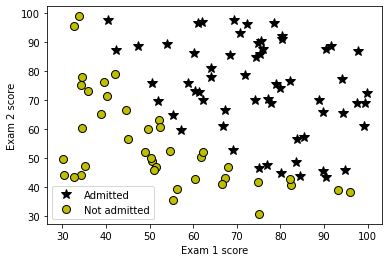

In [5]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(15,8))
plotData(X, y)
# add axes labels
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend(['Admitted', 'Not admitted'])
pass

In [6]:
def sigmoid(z):
 
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)
    
    g = 1/(1+np.exp(-z))

 
    return g

In [7]:
z = 1.6
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 1.6 ) =  0.8320183851339245


In [8]:
def  featureNormalize(X):

    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma

    
    # ================================================================
    return X_norm, mu, sigma

In [9]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [65.64427406 66.22199809]
Computed standard deviation: [19.36068671 18.48963567]


In [28]:
y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
m, n = X_norm.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [12]:
m,n

(100, 2)

In [33]:
def costFunction(theta, X, y):
    
    
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
   # J = 0
   # grad = np.zeros(theta.shape)
    h = sigmoid(np.dot(X, theta))
    J = (-1/m)*(np.dot(np.log(h),y) + np.dot(np.log(1-h), (1-y)))
   # grad = (1/m)*(np.dot((h-y), X))

    
    return J

In [34]:
initial_theta = np.zeros(n+1)

cost = costFunction(initial_theta, X, y)
print(cost)

0.6931471805599452


In [38]:
test_theta = np.array([1.71835438 ,3.99258451, 3.72493998])
cost = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
#print('Expected cost (approx): 0.218\n')


Cost at test theta: 0.203


In [39]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    theta = theta.copy()
    #J_history = []
    for i in range(num_iters):
        
        h = sigmoid(np.dot(X, theta))
        
        theta = theta - (alpha/m)*((h-y).dot(X))
        
                                   
        
        
        # save the cost J in every iteration
        J = costFunction(X, y, theta)
        
        print("J:",J)
        print()
        print("h:", h.shape)
        print()
        print("Iteration:",i)
        print()
        print("Theta:",theta)
        print("------------------")
theta = np.zeros(n+1)

# some gradient descent settings
iterations = 5000
alpha = 1
gradientDescent(X ,y, theta, alpha, iterations)
    

<ipython-input-33-49f43c5f8795>:11: RuntimeWarning: divide by zero encountered in log
  J = (-1/m)*(np.dot(np.log(h),y) + np.dot(np.log(1-h), (1-y)))


J: inf

h: (100,)

Iteration: 0

Theta: [0.1        0.28122914 0.25098615]
------------------
J: inf

h: (100,)

Iteration: 1

Theta: [0.17577876 0.49546915 0.44250119]
------------------
J: inf

h: (100,)

Iteration: 2

Theta: [0.23574565 0.66468039 0.59394016]
------------------
J: inf

h: (100,)

Iteration: 3

Theta: [0.28545743 0.80367452 0.71846474]
------------------
J: inf

h: (100,)

Iteration: 4

Theta: [0.3281938  0.92149876 0.824158  ]
------------------
J: inf

h: (100,)

Iteration: 5

Theta: [0.36592624 1.02379711 0.91607626]
------------------
J: inf

h: (100,)

Iteration: 6

Theta: [0.39989665 1.11425597 0.99752223]
------------------
J: inf

h: (100,)

Iteration: 7

Theta: [0.43092619 1.1953956  1.07074933]
------------------
J: inf

h: (100,)

Iteration: 8

Theta: [0.45958211 1.269009   1.13735535]
------------------
J: inf

h: (100,)

Iteration: 9

Theta: [0.48627152 1.33641536 1.19851098]
------------------
J: inf

h: (100,)

Iteration: 10

Theta: [0.51129643 1.39861

h: (100,)

Iteration: 118

Theta: [1.34024516 3.19286991 2.95195347]
------------------
J: -inf

h: (100,)

Iteration: 119

Theta: [1.34320768 3.19907896 2.95794361]
------------------
J: -inf

h: (100,)

Iteration: 120

Theta: [1.34613936 3.20522414 2.96387239]
------------------
J: -inf

h: (100,)

Iteration: 121

Theta: [1.34904066 3.21130641 2.96974073]
------------------
J: -inf

h: (100,)

Iteration: 122

Theta: [1.35191204 3.21732671 2.97554953]
------------------
J: -inf

h: (100,)

Iteration: 123

Theta: [1.35475396 3.22328598 2.98129969]
------------------
J: -inf

h: (100,)

Iteration: 124

Theta: [1.35756685 3.22918512 2.98699205]
------------------
J: -inf

h: (100,)

Iteration: 125

Theta: [1.36035114 3.235025   2.99262748]
------------------
J: -inf

h: (100,)

Iteration: 126

Theta: [1.36310727 3.24080651 2.99820679]
------------------
J: -inf

h: (100,)

Iteration: 127

Theta: [1.36583563 3.24653048 3.00373079]
------------------
J: -inf

h: (100,)

Iteration: 128

The

Iteration: 232

Theta: [1.55019284 3.63503664 3.379067  ]
------------------
J: -inf

h: (100,)

Iteration: 233

Theta: [1.55129935 3.63737925 3.3813321 ]
------------------
J: -inf

h: (100,)

Iteration: 234

Theta: [1.55239762 3.63970456 3.38358049]
------------------
J: -inf

h: (100,)

Iteration: 235

Theta: [1.55348773 3.64201272 3.38581231]
------------------
J: -inf

h: (100,)

Iteration: 236

Theta: [1.55456975 3.64430389 3.38802772]
------------------
J: -inf

h: (100,)

Iteration: 237

Theta: [1.55564376 3.64657821 3.39022686]
------------------
J: -inf

h: (100,)

Iteration: 238

Theta: [1.55670983 3.64883585 3.39240988]
------------------
J: -inf

h: (100,)

Iteration: 239

Theta: [1.55776803 3.65107694 3.39457691]
------------------
J: -inf

h: (100,)

Iteration: 240

Theta: [1.55881844 3.65330164 3.39672811]
------------------
J: -inf

h: (100,)

Iteration: 241

Theta: [1.55986111 3.65551009 3.39886362]
------------------
J: -inf

h: (100,)

Iteration: 242

Theta: [1.5608

Theta: [1.65265471 3.85252657 3.5894243 ]
------------------
J: -inf

h: (100,)

Iteration: 382

Theta: [1.6530546  3.85337762 3.59024765]
------------------
J: -inf

h: (100,)

Iteration: 383

Theta: [1.65345194 3.85422327 3.59106578]
------------------
J: -inf

h: (100,)

Iteration: 384

Theta: [1.65384674 3.85506355 3.59187872]
------------------
J: -inf

h: (100,)

Iteration: 385

Theta: [1.65423903 3.85589849 3.59268649]
------------------
J: -inf

h: (100,)

Iteration: 386

Theta: [1.65462883 3.85672814 3.59348914]
------------------
J: -inf

h: (100,)

Iteration: 387

Theta: [1.65501614 3.85755252 3.5942867 ]
------------------
J: -inf

h: (100,)

Iteration: 388

Theta: [1.65540099 3.85837168 3.59507921]
------------------
J: -inf

h: (100,)

Iteration: 389

Theta: [1.6557834  3.85918565 3.59586669]
------------------
J: -inf

h: (100,)

Iteration: 390

Theta: [1.65616338 3.85999447 3.5966492 ]
------------------
J: -inf

h: (100,)

Iteration: 391

Theta: [1.65654095 3.86079817 


Theta: [1.68043442 3.91169    3.64666529]
------------------
J: -inf

h: (100,)

Iteration: 473

Theta: [1.68066073 3.91217233 3.64713197]
------------------
J: -inf

h: (100,)

Iteration: 474

Theta: [1.68088566 3.91265171 3.64759581]
------------------
J: -inf

h: (100,)

Iteration: 475

Theta: [1.68110921 3.91312817 3.64805681]
------------------
J: -inf

h: (100,)

Iteration: 476

Theta: [1.6813314  3.91360172 3.64851499]
------------------
J: -inf

h: (100,)

Iteration: 477

Theta: [1.68155222 3.91407238 3.64897038]
------------------
J: -inf

h: (100,)

Iteration: 478

Theta: [1.6817717  3.91454017 3.649423  ]
------------------
J: -inf

h: (100,)

Iteration: 479

Theta: [1.68198984 3.9150051  3.64987285]
------------------
J: -inf

h: (100,)

Iteration: 480

Theta: [1.68220664 3.9154672  3.65031996]
------------------
J: -inf

h: (100,)

Iteration: 481

Theta: [1.68242212 3.91592649 3.65076435]
------------------
J: -inf

h: (100,)

Iteration: 482

Theta: [1.68263628 3.91638298


Iteration: 622

Theta: [1.70279534 3.95937367 3.69280361]
------------------
J: -inf

h: (100,)

Iteration: 623

Theta: [1.70288701 3.95956926 3.69299287]
------------------
J: -inf

h: (100,)

Iteration: 624

Theta: [1.70297814 3.9597637  3.69318102]
------------------
J: -inf

h: (100,)

Iteration: 625

Theta: [1.70306872 3.95995699 3.69336805]
------------------
J: -inf

h: (100,)

Iteration: 626

Theta: [1.70315878 3.96014913 3.69355397]
------------------
J: -inf

h: (100,)

Iteration: 627

Theta: [1.7032483  3.96034014 3.69373879]
------------------
J: -inf

h: (100,)

Iteration: 628

Theta: [1.70333728 3.96053002 3.69392252]
------------------
J: -inf

h: (100,)

Iteration: 629

Theta: [1.70342575 3.96071877 3.69410517]
------------------
J: -inf

h: (100,)

Iteration: 630

Theta: [1.70351369 3.96090641 3.69428673]
------------------
J: -inf

h: (100,)

Iteration: 631

Theta: [1.7036011  3.96109294 3.69446722]
------------------
J: -inf

h: (100,)

Iteration: 632

Theta: [1.703

Iteration: 727

Theta: [1.70998549 3.97471784 3.70765117]
------------------
J: -inf

h: (100,)

Iteration: 728

Theta: [1.71003479 3.97482308 3.70775301]
------------------
J: -inf

h: (100,)

Iteration: 729

Theta: [1.71008381 3.9749277  3.70785425]
------------------
J: -inf

h: (100,)

Iteration: 730

Theta: [1.71013254 3.97503171 3.70795489]
------------------
J: -inf

h: (100,)

Iteration: 731

Theta: [1.71018098 3.97513511 3.70805495]
------------------
J: -inf

h: (100,)

Iteration: 732

Theta: [1.71022914 3.97523791 3.70815442]
------------------
J: -inf

h: (100,)

Iteration: 733

Theta: [1.71027702 3.9753401  3.7082533 ]
------------------
J: -inf

h: (100,)

Iteration: 734

Theta: [1.71032462 3.97544169 3.70835161]
------------------
J: -inf

h: (100,)

Iteration: 735

Theta: [1.71037194 3.97554269 3.70844934]
------------------
J: -inf

h: (100,)

Iteration: 736

Theta: [1.71041898 3.9756431  3.7085465 ]
------------------
J: -inf

h: (100,)

Iteration: 737

Theta: [1.7104


h: (100,)

Iteration: 892

Theta: [1.71521472 3.9858808  3.71845304]
------------------
J: -inf

h: (100,)

Iteration: 893

Theta: [1.71523349 3.98592087 3.71849182]
------------------
J: -inf

h: (100,)

Iteration: 894

Theta: [1.71525215 3.98596072 3.71853037]
------------------
J: -inf

h: (100,)

Iteration: 895

Theta: [1.71527071 3.98600033 3.71856871]
------------------
J: -inf

h: (100,)

Iteration: 896

Theta: [1.71528915 3.98603971 3.71860682]
------------------
J: -inf

h: (100,)

Iteration: 897

Theta: [1.71530749 3.98607887 3.7186447 ]
------------------
J: -inf

h: (100,)

Iteration: 898

Theta: [1.71532572 3.98611779 3.71868237]
------------------
J: -inf

h: (100,)

Iteration: 899

Theta: [1.71534385 3.98615649 3.71871982]
------------------
J: -inf

h: (100,)

Iteration: 900

Theta: [1.71536187 3.98619497 3.71875705]
------------------
J: -inf

h: (100,)

Iteration: 901

Theta: [1.71537979 3.98623322 3.71879406]
------------------
J: -inf

h: (100,)

Iteration: 902

Th

J: -inf

h: (100,)

Iteration: 1009

Theta: [1.71681153 3.98929013 3.72175211]
------------------
J: -inf

h: (100,)

Iteration: 1010

Theta: [1.71682102 3.9893104  3.72177173]
------------------
J: -inf

h: (100,)

Iteration: 1011

Theta: [1.71683046 3.98933055 3.72179123]
------------------
J: -inf

h: (100,)

Iteration: 1012

Theta: [1.71683984 3.98935059 3.72181062]
------------------
J: -inf

h: (100,)

Iteration: 1013

Theta: [1.71684917 3.98937051 3.7218299 ]
------------------
J: -inf

h: (100,)

Iteration: 1014

Theta: [1.71685845 3.98939032 3.72184906]
------------------
J: -inf

h: (100,)

Iteration: 1015

Theta: [1.71686767 3.98941001 3.72186812]
------------------
J: -inf

h: (100,)

Iteration: 1016

Theta: [1.71687684 3.98942958 3.72188706]
------------------
J: -inf

h: (100,)

Iteration: 1017

Theta: [1.71688596 3.98944905 3.7219059 ]
------------------
J: -inf

h: (100,)

Iteration: 1018

Theta: [1.71689502 3.9894684  3.72192462]
------------------
J: -inf

h: (100,)



Theta: [1.71764337 3.99106629 3.72347085]
------------------
J: -inf

h: (100,)

Iteration: 1132

Theta: [1.71764804 3.99107626 3.7234805 ]
------------------
J: -inf

h: (100,)

Iteration: 1133

Theta: [1.71765268 3.99108618 3.72349009]
------------------
J: -inf

h: (100,)

Iteration: 1134

Theta: [1.7176573  3.99109603 3.72349963]
------------------
J: -inf

h: (100,)

Iteration: 1135

Theta: [1.71766189 3.99110583 3.72350911]
------------------
J: -inf

h: (100,)

Iteration: 1136

Theta: [1.71766645 3.99111557 3.72351853]
------------------
J: -inf

h: (100,)

Iteration: 1137

Theta: [1.71767098 3.99112526 3.72352791]
------------------
J: -inf

h: (100,)

Iteration: 1138

Theta: [1.71767549 3.99113489 3.72353723]
------------------
J: -inf

h: (100,)

Iteration: 1139

Theta: [1.71767998 3.99114446 3.72354649]
------------------
J: -inf

h: (100,)

Iteration: 1140

Theta: [1.71768443 3.99115398 3.7235557 ]
------------------
J: -inf

h: (100,)

Iteration: 1141

Theta: [1.71768887 3

J: -inf

h: (100,)

Iteration: 1258

Theta: [1.71806399 3.99196445 3.72433996]
------------------
J: -inf

h: (100,)

Iteration: 1259

Theta: [1.71806622 3.99196921 3.72434457]
------------------
J: -inf

h: (100,)

Iteration: 1260

Theta: [1.71806844 3.99197395 3.72434916]
------------------
J: -inf

h: (100,)

Iteration: 1261

Theta: [1.71807065 3.99197866 3.72435372]
------------------
J: -inf

h: (100,)

Iteration: 1262

Theta: [1.71807284 3.99198335 3.72435825]
------------------
J: -inf

h: (100,)

Iteration: 1263

Theta: [1.71807502 3.99198801 3.72436276]
------------------
J: -inf

h: (100,)

Iteration: 1264

Theta: [1.71807719 3.99199264 3.72436724]
------------------
J: -inf

h: (100,)

Iteration: 1265

Theta: [1.71807935 3.99199724 3.72437169]
------------------
J: -inf

h: (100,)

Iteration: 1266

Theta: [1.71808149 3.99200182 3.72437612]
------------------
J: -inf

h: (100,)

Iteration: 1267

Theta: [1.71808362 3.99200637 3.72438052]
------------------
J: -inf

h: (100,)



J: -inf

h: (100,)

Iteration: 1391

Theta: [1.71827142 3.99240737 3.72476857]
------------------
J: -inf

h: (100,)

Iteration: 1392

Theta: [1.71827245 3.99240957 3.7247707 ]
------------------
J: -inf

h: (100,)

Iteration: 1393

Theta: [1.71827348 3.99241176 3.72477281]
------------------
J: -inf

h: (100,)

Iteration: 1394

Theta: [1.7182745  3.99241394 3.72477492]
------------------
J: -inf

h: (100,)

Iteration: 1395

Theta: [1.71827551 3.9924161  3.72477701]
------------------
J: -inf

h: (100,)

Iteration: 1396

Theta: [1.71827652 3.99241825 3.72477909]
------------------
J: -inf

h: (100,)

Iteration: 1397

Theta: [1.71827752 3.99242039 3.72478116]
------------------
J: -inf

h: (100,)

Iteration: 1398

Theta: [1.71827851 3.99242252 3.72478322]
------------------
J: -inf

h: (100,)

Iteration: 1399

Theta: [1.7182795  3.99242463 3.72478527]
------------------
J: -inf

h: (100,)

Iteration: 1400

Theta: [1.71828049 3.99242673 3.7247873 ]
------------------
J: -inf

h: (100,)



J: -inf

h: (100,)

Iteration: 1510

Theta: [1.71836026 3.99259708 3.72495214]
------------------
J: -inf

h: (100,)

Iteration: 1511

Theta: [1.71836078 3.99259818 3.7249532 ]
------------------
J: -inf

h: (100,)

Iteration: 1512

Theta: [1.71836129 3.99259928 3.72495426]
------------------
J: -inf

h: (100,)

Iteration: 1513

Theta: [1.7183618  3.99260037 3.72495532]
------------------
J: -inf

h: (100,)

Iteration: 1514

Theta: [1.71836231 3.99260145 3.72495637]
------------------
J: -inf

h: (100,)

Iteration: 1515

Theta: [1.71836281 3.99260253 3.72495741]
------------------
J: -inf

h: (100,)

Iteration: 1516

Theta: [1.71836331 3.9926036  3.72495845]
------------------
J: -inf

h: (100,)

Iteration: 1517

Theta: [1.71836381 3.99260467 3.72495948]
------------------
J: -inf

h: (100,)

Iteration: 1518

Theta: [1.71836431 3.99260572 3.7249605 ]
------------------
J: -inf

h: (100,)

Iteration: 1519

Theta: [1.7183648  3.99260678 3.72496152]
------------------
J: -inf

h: (100,)




Iteration: 1631

Theta: [1.71840529 3.99269323 3.72504518]
------------------
J: -inf

h: (100,)

Iteration: 1632

Theta: [1.71840555 3.99269378 3.72504571]
------------------
J: -inf

h: (100,)

Iteration: 1633

Theta: [1.7184058  3.99269432 3.72504623]
------------------
J: -inf

h: (100,)

Iteration: 1634

Theta: [1.71840605 3.99269486 3.72504676]
------------------
J: -inf

h: (100,)

Iteration: 1635

Theta: [1.7184063  3.9926954  3.72504728]
------------------
J: -inf

h: (100,)

Iteration: 1636

Theta: [1.71840655 3.99269593 3.72504779]
------------------
J: -inf

h: (100,)

Iteration: 1637

Theta: [1.7184068  3.99269646 3.72504831]
------------------
J: -inf

h: (100,)

Iteration: 1638

Theta: [1.71840705 3.99269699 3.72504882]
------------------
J: -inf

h: (100,)

Iteration: 1639

Theta: [1.7184073  3.99269751 3.72504932]
------------------
J: -inf

h: (100,)

Iteration: 1640

Theta: [1.71840754 3.99269803 3.72504983]
------------------
J: -inf

h: (100,)

Iteration: 1641

Th

J: -inf

h: (100,)

Iteration: 1768

Theta: [1.71842953 3.992745   3.72509528]
------------------
J: -inf

h: (100,)

Iteration: 1769

Theta: [1.71842965 3.99274525 3.72509551]
------------------
J: -inf

h: (100,)

Iteration: 1770

Theta: [1.71842976 3.99274549 3.72509575]
------------------
J: -inf

h: (100,)

Iteration: 1771

Theta: [1.71842988 3.99274574 3.72509599]
------------------
J: -inf

h: (100,)

Iteration: 1772

Theta: [1.71842999 3.99274598 3.72509622]
------------------
J: -inf

h: (100,)

Iteration: 1773

Theta: [1.7184301  3.99274622 3.72509646]
------------------
J: -inf

h: (100,)

Iteration: 1774

Theta: [1.71843022 3.99274646 3.72509669]
------------------
J: -inf

h: (100,)

Iteration: 1775

Theta: [1.71843033 3.9927467  3.72509692]
------------------
J: -inf

h: (100,)

Iteration: 1776

Theta: [1.71843044 3.99274693 3.72509715]
------------------
J: -inf

h: (100,)

Iteration: 1777

Theta: [1.71843055 3.99274717 3.72509737]
------------------
J: -inf

h: (100,)




Theta: [1.71843937 3.992766   3.7251156 ]
------------------
J: -inf

h: (100,)

Iteration: 1886

Theta: [1.71843943 3.99276612 3.72511572]
------------------
J: -inf

h: (100,)

Iteration: 1887

Theta: [1.71843948 3.99276625 3.72511584]
------------------
J: -inf

h: (100,)

Iteration: 1888

Theta: [1.71843954 3.99276637 3.72511596]
------------------
J: -inf

h: (100,)

Iteration: 1889

Theta: [1.7184396  3.9927665  3.72511608]
------------------
J: -inf

h: (100,)

Iteration: 1890

Theta: [1.71843966 3.99276662 3.72511619]
------------------
J: -inf

h: (100,)

Iteration: 1891

Theta: [1.71843971 3.99276674 3.72511631]
------------------
J: -inf

h: (100,)

Iteration: 1892

Theta: [1.71843977 3.99276686 3.72511643]
------------------
J: -inf

h: (100,)

Iteration: 1893

Theta: [1.71843983 3.99276698 3.72511655]
------------------
J: -inf

h: (100,)

Iteration: 1894

Theta: [1.71843988 3.9927671  3.72511666]
------------------
J: -inf

h: (100,)

Iteration: 1895

Theta: [1.71843994 

J: -inf

h: (100,)

Iteration: 2014

Theta: [1.7184447  3.99277738 3.72512661]
------------------
J: -inf

h: (100,)

Iteration: 2015

Theta: [1.71844473 3.99277744 3.72512667]
------------------
J: -inf

h: (100,)

Iteration: 2016

Theta: [1.71844475 3.9927775  3.72512673]
------------------
J: -inf

h: (100,)

Iteration: 2017

Theta: [1.71844478 3.99277756 3.72512678]
------------------
J: -inf

h: (100,)

Iteration: 2018

Theta: [1.71844481 3.99277762 3.72512684]
------------------
J: -inf

h: (100,)

Iteration: 2019

Theta: [1.71844484 3.99277767 3.72512689]
------------------
J: -inf

h: (100,)

Iteration: 2020

Theta: [1.71844486 3.99277773 3.72512695]
------------------
J: -inf

h: (100,)

Iteration: 2021

Theta: [1.71844489 3.99277779 3.725127  ]
------------------
J: -inf

h: (100,)

Iteration: 2022

Theta: [1.71844492 3.99277785 3.72512706]
------------------
J: -inf

h: (100,)

Iteration: 2023

Theta: [1.71844494 3.9927779  3.72512711]
------------------
J: -inf

h: (100,)



h: (100,)

Iteration: 2098

Theta: [1.71844654 3.99278132 3.72513042]
------------------
J: -inf

h: (100,)

Iteration: 2099

Theta: [1.71844656 3.99278136 3.72513046]
------------------
J: -inf

h: (100,)

Iteration: 2100

Theta: [1.71844658 3.9927814  3.72513049]
------------------
J: -inf

h: (100,)

Iteration: 2101

Theta: [1.71844659 3.99278143 3.72513053]
------------------
J: -inf

h: (100,)

Iteration: 2102

Theta: [1.71844661 3.99278147 3.72513056]
------------------
J: -inf

h: (100,)

Iteration: 2103

Theta: [1.71844663 3.9927815  3.7251306 ]
------------------
J: -inf

h: (100,)

Iteration: 2104

Theta: [1.71844664 3.99278154 3.72513063]
------------------
J: -inf

h: (100,)

Iteration: 2105

Theta: [1.71844666 3.99278157 3.72513067]
------------------
J: -inf

h: (100,)

Iteration: 2106

Theta: [1.71844668 3.99278161 3.7251307 ]
------------------
J: -inf

h: (100,)

Iteration: 2107

Theta: [1.71844669 3.99278164 3.72513073]
------------------
J: -inf

h: (100,)

Iteration

h: (100,)

Iteration: 2212

Theta: [1.71844797 3.99278436 3.72513336]
------------------
J: -inf

h: (100,)

Iteration: 2213

Theta: [1.71844797 3.99278438 3.72513338]
------------------
J: -inf

h: (100,)

Iteration: 2214

Theta: [1.71844798 3.99278439 3.7251334 ]
------------------
J: -inf

h: (100,)

Iteration: 2215

Theta: [1.71844799 3.99278441 3.72513342]
------------------
J: -inf

h: (100,)

Iteration: 2216

Theta: [1.718448   3.99278443 3.72513343]
------------------
J: -inf

h: (100,)

Iteration: 2217

Theta: [1.71844801 3.99278445 3.72513345]
------------------
J: -inf

h: (100,)

Iteration: 2218

Theta: [1.71844802 3.99278447 3.72513347]
------------------
J: -inf

h: (100,)

Iteration: 2219

Theta: [1.71844803 3.99278449 3.72513349]
------------------
J: -inf

h: (100,)

Iteration: 2220

Theta: [1.71844803 3.9927845  3.7251335 ]
------------------
J: -inf

h: (100,)

Iteration: 2221

Theta: [1.71844804 3.99278452 3.72513352]
------------------
J: -inf

h: (100,)

Iteration

h: (100,)

Iteration: 2348

Theta: [1.71844879 3.99278612 3.72513507]
------------------
J: -inf

h: (100,)

Iteration: 2349

Theta: [1.7184488  3.99278613 3.72513508]
------------------
J: -inf

h: (100,)

Iteration: 2350

Theta: [1.7184488  3.99278614 3.72513509]
------------------
J: -inf

h: (100,)

Iteration: 2351

Theta: [1.7184488  3.99278615 3.72513509]
------------------
J: -inf

h: (100,)

Iteration: 2352

Theta: [1.71844881 3.99278616 3.7251351 ]
------------------
J: -inf

h: (100,)

Iteration: 2353

Theta: [1.71844881 3.99278617 3.72513511]
------------------
J: -inf

h: (100,)

Iteration: 2354

Theta: [1.71844882 3.99278617 3.72513512]
------------------
J: -inf

h: (100,)

Iteration: 2355

Theta: [1.71844882 3.99278618 3.72513513]
------------------
J: -inf

h: (100,)

Iteration: 2356

Theta: [1.71844882 3.99278619 3.72513513]
------------------
J: -inf

h: (100,)

Iteration: 2357

Theta: [1.71844883 3.9927862  3.72513514]
------------------
J: -inf

h: (100,)

Iteration

Theta: [1.71844919 3.99278697 3.72513589]
------------------
J: -inf

h: (100,)

Iteration: 2496

Theta: [1.71844919 3.99278697 3.72513589]
------------------
J: -inf

h: (100,)

Iteration: 2497

Theta: [1.71844919 3.99278697 3.72513589]
------------------
J: -inf

h: (100,)

Iteration: 2498

Theta: [1.71844919 3.99278698 3.7251359 ]
------------------
J: -inf

h: (100,)

Iteration: 2499

Theta: [1.71844919 3.99278698 3.7251359 ]
------------------
J: -inf

h: (100,)

Iteration: 2500

Theta: [1.71844919 3.99278698 3.7251359 ]
------------------
J: -inf

h: (100,)

Iteration: 2501

Theta: [1.7184492  3.99278699 3.72513591]
------------------
J: -inf

h: (100,)

Iteration: 2502

Theta: [1.7184492  3.99278699 3.72513591]
------------------
J: -inf

h: (100,)

Iteration: 2503

Theta: [1.7184492  3.99278699 3.72513591]
------------------
J: -inf

h: (100,)

Iteration: 2504

Theta: [1.7184492  3.992787   3.72513592]
------------------
J: -inf

h: (100,)

Iteration: 2505

Theta: [1.7184492  3

J: -inf

h: (100,)

Iteration: 2621

Theta: [1.71844934 3.99278729 3.7251362 ]
------------------
J: -inf

h: (100,)

Iteration: 2622

Theta: [1.71844934 3.99278729 3.7251362 ]
------------------
J: -inf

h: (100,)

Iteration: 2623

Theta: [1.71844934 3.99278729 3.7251362 ]
------------------
J: -inf

h: (100,)

Iteration: 2624

Theta: [1.71844934 3.9927873  3.7251362 ]
------------------
J: -inf

h: (100,)

Iteration: 2625

Theta: [1.71844934 3.9927873  3.72513621]
------------------
J: -inf

h: (100,)

Iteration: 2626

Theta: [1.71844934 3.9927873  3.72513621]
------------------
J: -inf

h: (100,)

Iteration: 2627

Theta: [1.71844934 3.9927873  3.72513621]
------------------
J: -inf

h: (100,)

Iteration: 2628

Theta: [1.71844934 3.9927873  3.72513621]
------------------
J: -inf

h: (100,)

Iteration: 2629

Theta: [1.71844934 3.9927873  3.72513621]
------------------
J: -inf

h: (100,)

Iteration: 2630

Theta: [1.71844935 3.99278731 3.72513621]
------------------
J: -inf

h: (100,)




h: (100,)

Iteration: 2736

Theta: [1.71844941 3.99278744 3.72513634]
------------------
J: -inf

h: (100,)

Iteration: 2737

Theta: [1.71844941 3.99278744 3.72513634]
------------------
J: -inf

h: (100,)

Iteration: 2738

Theta: [1.71844941 3.99278744 3.72513634]
------------------
J: -inf

h: (100,)

Iteration: 2739

Theta: [1.71844941 3.99278744 3.72513634]
------------------
J: -inf

h: (100,)

Iteration: 2740

Theta: [1.71844941 3.99278744 3.72513634]
------------------
J: -inf

h: (100,)

Iteration: 2741

Theta: [1.71844941 3.99278744 3.72513635]
------------------
J: -inf

h: (100,)

Iteration: 2742

Theta: [1.71844941 3.99278744 3.72513635]
------------------
J: -inf

h: (100,)

Iteration: 2743

Theta: [1.71844941 3.99278744 3.72513635]
------------------
J: -inf

h: (100,)

Iteration: 2744

Theta: [1.71844941 3.99278744 3.72513635]
------------------
J: -inf

h: (100,)

Iteration: 2745

Theta: [1.71844941 3.99278744 3.72513635]
------------------
J: -inf

h: (100,)

Iteratio

J: -inf

h: (100,)

Iteration: 2857

Theta: [1.71844944 3.99278751 3.72513642]
------------------
J: -inf

h: (100,)

Iteration: 2858

Theta: [1.71844944 3.99278752 3.72513642]
------------------
J: -inf

h: (100,)

Iteration: 2859

Theta: [1.71844944 3.99278752 3.72513642]
------------------
J: -inf

h: (100,)

Iteration: 2860

Theta: [1.71844944 3.99278752 3.72513642]
------------------
J: -inf

h: (100,)

Iteration: 2861

Theta: [1.71844944 3.99278752 3.72513642]
------------------
J: -inf

h: (100,)

Iteration: 2862

Theta: [1.71844944 3.99278752 3.72513642]
------------------
J: -inf

h: (100,)

Iteration: 2863

Theta: [1.71844944 3.99278752 3.72513642]
------------------
J: -inf

h: (100,)

Iteration: 2864

Theta: [1.71844945 3.99278752 3.72513642]
------------------
J: -inf

h: (100,)

Iteration: 2865

Theta: [1.71844945 3.99278752 3.72513642]
------------------
J: -inf

h: (100,)

Iteration: 2866

Theta: [1.71844945 3.99278752 3.72513642]
------------------
J: -inf

h: (100,)



Iteration: 3017

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3018

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3019

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3020

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3021

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3022

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3023

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3024

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3025

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3026

Theta: [1.71844947 3.99278756 3.72513646]
------------------
J: -inf

h: (100,)

Iteration: 3027

The

Iteration: 3103

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3104

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3105

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3106

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3107

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3108

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3109

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3110

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3111

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3112

Theta: [1.71844947 3.99278757 3.72513647]
------------------
J: -inf

h: (100,)

Iteration: 3113

The


h: (100,)

Iteration: 3255

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteration: 3256

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteration: 3257

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteration: 3258

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteration: 3259

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteration: 3260

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteration: 3261

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteration: 3262

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteration: 3263

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteration: 3264

Theta: [1.71844948 3.99278758 3.72513648]
------------------
J: -inf

h: (100,)

Iteratio

------------------
J: -inf

h: (100,)

Iteration: 3405

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3406

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3407

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3408

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3409

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3410

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3411

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3412

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3413

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3414

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3556

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3557

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3558

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3559

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3560

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3561

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3562

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3563

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3564

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3565

Theta: [1.71844948 3


h: (100,)

Iteration: 3711

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3712

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3713

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3714

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3715

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3716

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3717

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3718

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3719

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3720

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteratio

J: -inf

h: (100,)

Iteration: 3833

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3834

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3835

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3836

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3837

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3838

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3839

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3840

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3841

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3842

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)




Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3944

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3945

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3946

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3947

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3948

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3949

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3950

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3951

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3952

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 3953

Theta: [1.71844948 

h: (100,)

Iteration: 4065

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4066

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4067

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4068

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4069

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4070

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4071

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4072

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4073

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4074

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration

J: -inf

h: (100,)

Iteration: 4192

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4193

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4194

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4195

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4196

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4197

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4198

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4199

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4200

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4201

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)



Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4318

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4319

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4320

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4321

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4322

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4323

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4324

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4325

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4326

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4327

Theta: [1.71844948 3

J: -inf

h: (100,)

Iteration: 4448

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4449

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4450

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4451

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4452

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4453

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4454

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4455

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4456

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4457

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)



Iteration: 4592

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4593

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4594

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4595

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4596

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4597

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4598

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4599

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4600

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4601

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4602

The

Iteration: 4705

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4706

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4707

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4708

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4709

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4710

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4711

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4712

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4713

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4714

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4715

The

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4827

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4828

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4829

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4830

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4831

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4832

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4833

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4834

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4835

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4836

Theta: [1.71844948 3

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4968

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4969

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4970

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4971

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4972

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4973

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4974

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4975

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4976

Theta: [1.71844948 3.99278759 3.72513649]
------------------
J: -inf

h: (100,)

Iteration: 4977

Theta: [1.71844948 3

In [6]:
import pandas as pd
da = pd.read_csv('energy_data.csv')
da.shape

(1000, 25)